In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

import warnings
warnings.filterwarnings("ignore")

In [5]:
# Load the dataset 
file = "MentalHealthSurvey.csv"
df = pd.read_csv(file)
# Display the first few rows and summary 
df.head()

,gender,age,university,degree_level,degree_major,academic_year,cgpa,residential_status,campus_discrimination,sports_engagement,...,study_satisfaction,academic_workload,academic_pressure,financial_concerns,social_relationships,depression,anxiety,isolation,future_insecurity,stress_relief_activities
0,Male,20,PU,Undergraduate,Data Science,2nd year,3.0-3.5,Off-Campus,No,No Sports,...,5,4,5,4,3,2,1,1,2,"Religious Activities, Social Connections, Onli..."
1,Male,20,UET,Postgraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,No,1-3 times,...,5,4,4,1,3,3,3,3,4,Online Entertainment
2,Male,20,FAST,Undergraduate,Computer Science,3rd year,2.5-3.0,Off-Campus,No,1-3 times,...,5,5,5,3,4,2,3,3,1,"Religious Activities, Sports and Fitness, Onli..."
3,Male,20,UET,Undergraduate,Computer Science,3rd year,2.5-3.0,On-Campus,No,No Sports,...,3,5,4,4,1,5,5,5,3,Online Entertainment
4,Female,20,UET,Undergraduate,Computer Science,3rd year,3.0-3.5,Off-Campus,Yes,No Sports,...,3,5,5,2,3,5,5,4,4,Online Entertainment


In [6]:
df.shape


(87, 21)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    87 non-null     object
 1   age                       87 non-null     int64 
 2   university                87 non-null     object
 3   degree_level              87 non-null     object
 4   degree_major              87 non-null     object
 5   academic_year             87 non-null     object
 6   cgpa                      87 non-null     object
 7   residential_status        87 non-null     object
 8   campus_discrimination     87 non-null     object
 9   sports_engagement         87 non-null     object
 10  average_sleep             87 non-null     object
 11  study_satisfaction        87 non-null     int64 
 12  academic_workload         87 non-null     int64 
 13  academic_pressure         87 non-null     int64 
 14  financial_concerns        87

In [8]:
df.isnull().sum()

gender                      0
age                         0
university                  0
degree_level                0
degree_major                0
academic_year               0
cgpa                        0
residential_status          0
campus_discrimination       0
sports_engagement           0
average_sleep               0
study_satisfaction          0
academic_workload           0
academic_pressure           0
financial_concerns          0
social_relationships        0
depression                  0
anxiety                     0
isolation                   0
future_insecurity           0
stress_relief_activities    0
dtype: int64

In [9]:
df.duplicated().sum()


np.int64(0)

In [10]:
# Numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Non-numerical columns
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the numerical and non-numerical columns
print("\nCategorical Columns:\n", non_numerical_columns)
print("\n***********\n")
print("\nNumerical Columns:\n", numerical_columns)



Categorical Columns:
 ['gender', 'university', 'degree_level', 'degree_major', 'academic_year', 'cgpa', 'residential_status', 'campus_discrimination', 'sports_engagement', 'average_sleep', 'stress_relief_activities']

***********


Numerical Columns:
 ['age', 'study_satisfaction', 'academic_workload ', 'academic_pressure', 'financial_concerns', 'social_relationships', 'depression', 'anxiety', 'isolation', 'future_insecurity']


In [11]:
df.nunique()



gender                       2
age                          8
university                   9
degree_level                 2
degree_major                 4
academic_year                4
cgpa                         6
residential_status           2
campus_discrimination        2
sports_engagement            4
average_sleep                3
study_satisfaction           5
academic_workload            4
academic_pressure            5
financial_concerns           5
social_relationships         5
depression                   5
anxiety                      5
isolation                    5
future_insecurity            5
stress_relief_activities    38
dtype: int64

In [12]:
# Display descriptive statistics for numerical columns
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,87.0,19.942529,1.623636,17.0,19.0,20.0,21.0,26.0
study_satisfaction,87.0,3.931034,1.043174,1.0,3.0,4.0,5.0,5.0
academic_workload,87.0,3.885057,0.854880,2.0,3.0,4.0,4.5,5.0
academic_pressure,87.0,3.781609,1.125035,1.0,3.0,4.0,5.0,5.0
financial_concerns,87.0,3.390805,1.400634,1.0,2.5,3.0,5.0,5.0
social_relationships,87.0,2.781609,1.175578,1.0,2.0,3.0,4.0,5.0
depression,87.0,3.218391,1.367609,1.0,2.0,3.0,4.0,5.0
anxiety,87.0,3.218391,1.297809,1.0,2.0,3.0,4.0,5.0
isolation,87.0,3.241379,1.405682,1.0,2.0,3.0,4.5,5.0
future_insecurity,87.0,3.011494,1.385089,1.0,2.0,3.0,4.0,5.0


In [13]:
df.corr


<bound method DataFrame.corr of     gender  age university   degree_level            degree_major  \
0     Male   20         PU  Undergraduate            Data Science   
1     Male   20        UET   Postgraduate        Computer Science   
2     Male   20       FAST  Undergraduate        Computer Science   
3     Male   20        UET  Undergraduate        Computer Science   
4   Female   20        UET  Undergraduate        Computer Science   
..     ...  ...        ...            ...                     ...   
82    Male   22         PU  Undergraduate  Information Technology   
83  Female   22    COMSATS  Undergraduate    Software Engineering   
84    Male   21         PU  Undergraduate            Data Science   
85    Male   22         PU  Undergraduate            Data Science   
86  Female   19         PU  Undergraduate            Data Science   

   academic_year     cgpa residential_status campus_discrimination  \
0       2nd year  3.0-3.5         Off-Campus                    No   

In [15]:
# Function to display barplot and pie chart for categorical columns
def plot_categorical_distribution(column_name):
    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    sns.countplot(y=column_name, data=df, palette='Blues')  
    plt.title(f'Distribution of {column_name}')
    
    ax = plt.gca()
    for p in ax.patches:
        ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                    ha='center', va='center', xytext=(10, 0), textcoords='offset points')
    
    sns.despine(left=True, bottom=True)
    
    plt.subplot(1, 2, 2)
    df[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('Blues'), startangle=90, explode=[0.05]*df[column_name].nunique())
    plt.title(f'Percentage Distribution of {column_name}')
    plt.ylabel('')  
    
    # Display the plots
    plt.tight_layout()
    plt.show()

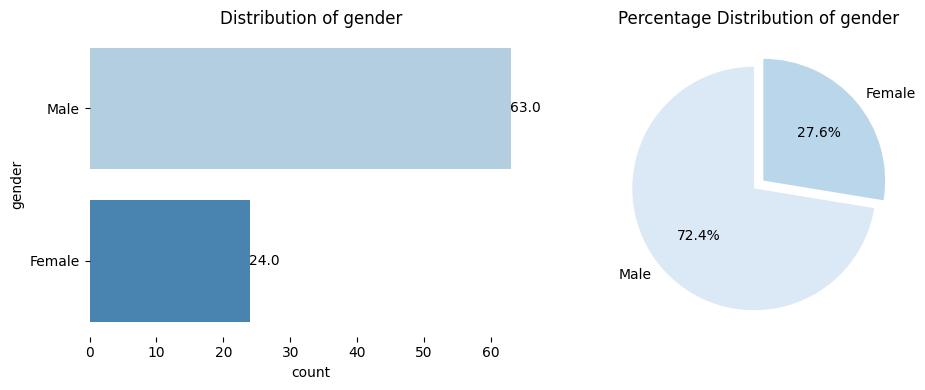

In [16]:
 # for the 'gender' column
plot_categorical_distribution('gender')

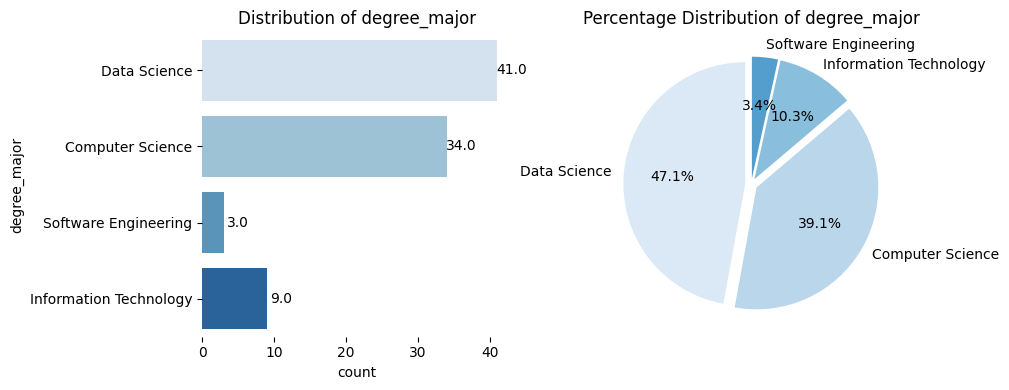

In [17]:
# for the 'degree_major' column
plot_categorical_distribution('degree_major')

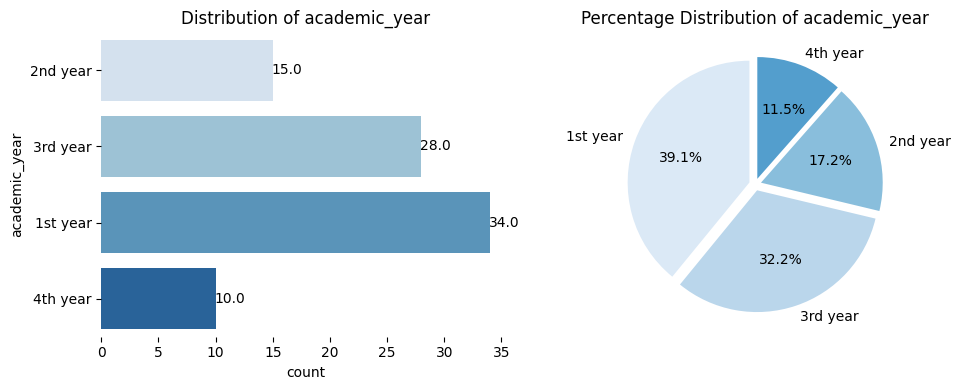

In [18]:
# for the 'academic_year' column
plot_categorical_distribution('academic_year')

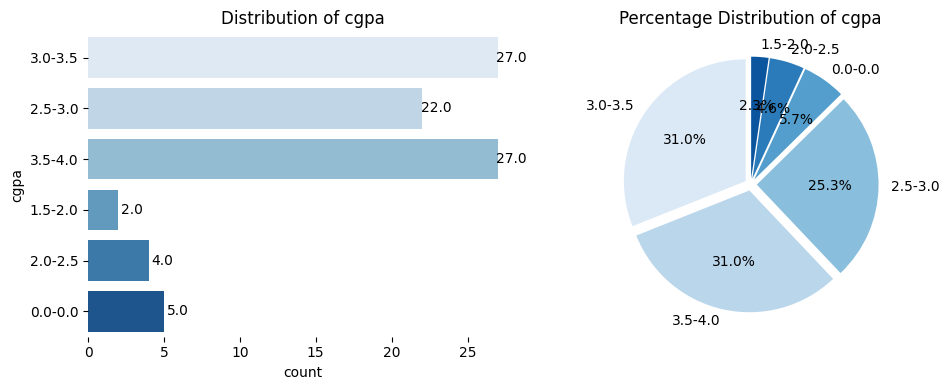

In [19]:
# for the 'cgpa' column
plot_categorical_distribution('cgpa')


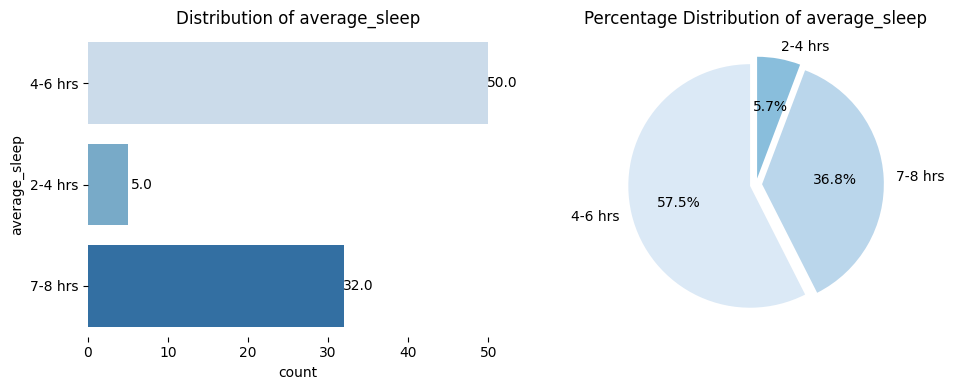

In [20]:
# for the 'average_sleep' column
plot_categorical_distribution('average_sleep')

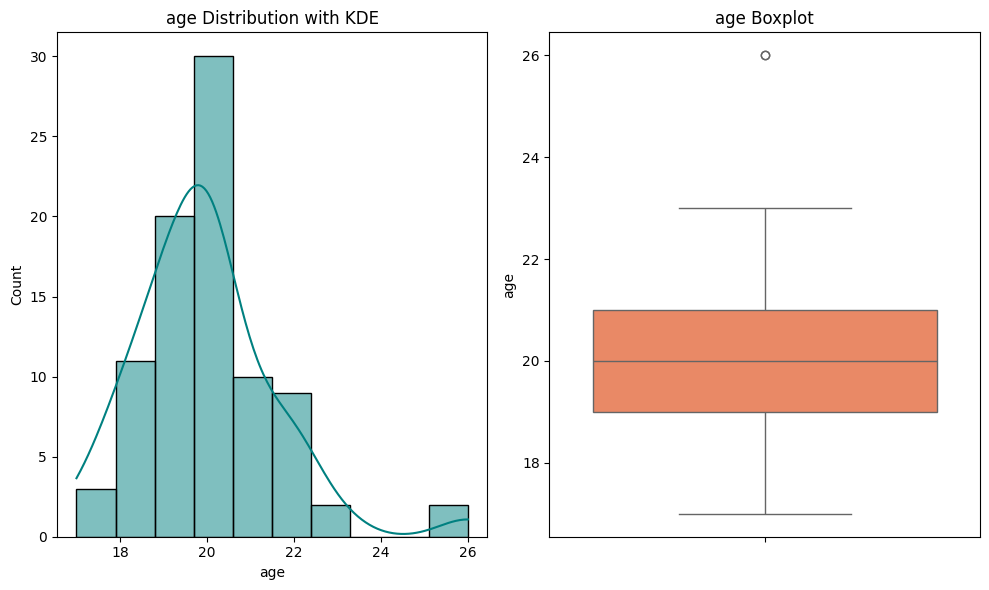


Summary Statistics for age:
 count    87.000000
mean     19.942529
std       1.623636
min      17.000000
25%      19.000000
50%      20.000000
75%      21.000000
max      26.000000
Name: age, dtype: float64


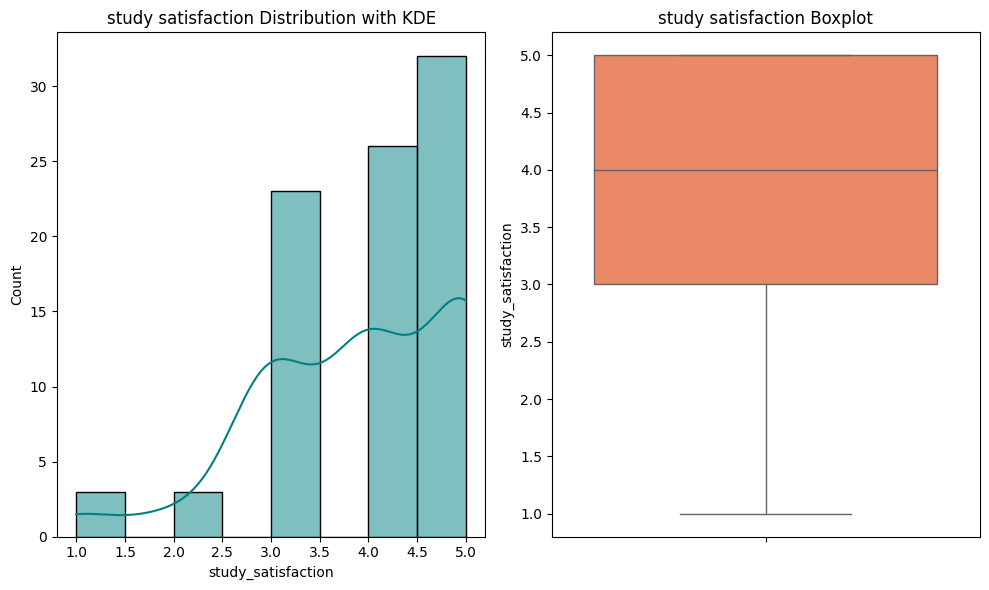


Summary Statistics for study satisfaction:
 count    87.000000
mean      3.931034
std       1.043174
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: study_satisfaction, dtype: float64


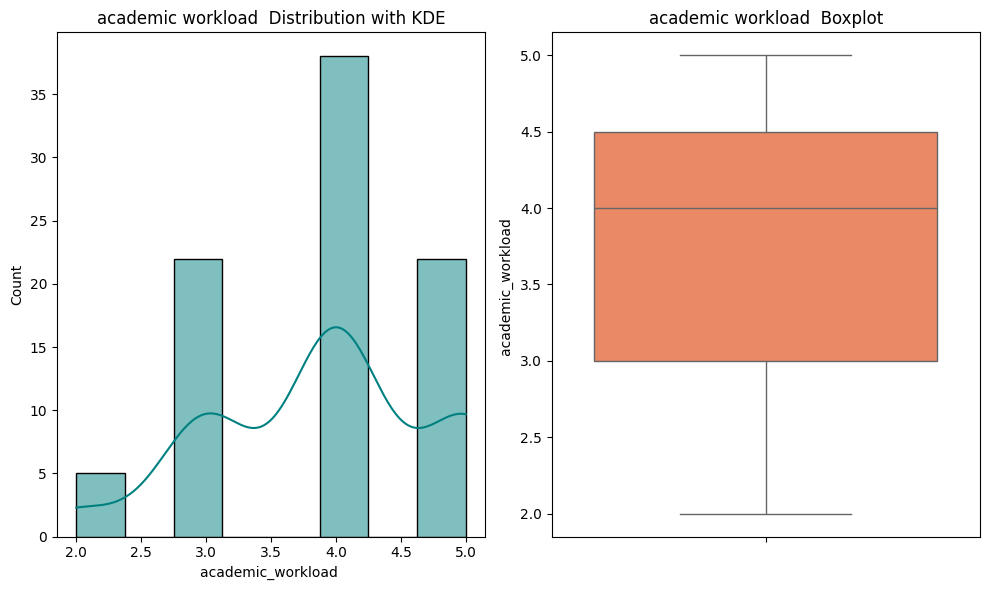


Summary Statistics for academic workload :
 count    87.000000
mean      3.885057
std       0.854880
min       2.000000
25%       3.000000
50%       4.000000
75%       4.500000
max       5.000000
Name: academic_workload , dtype: float64


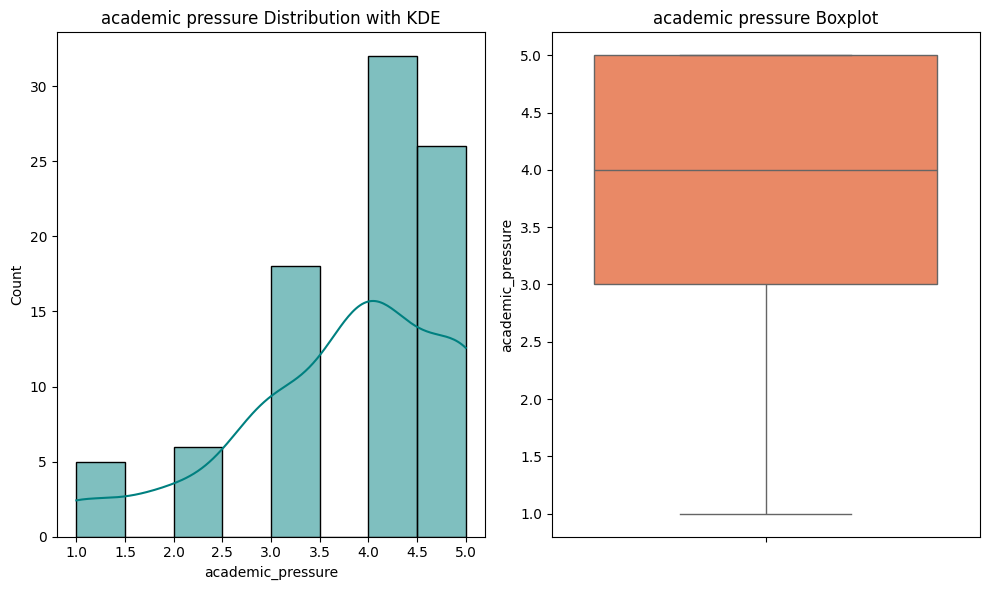


Summary Statistics for academic pressure:
 count    87.000000
mean      3.781609
std       1.125035
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: academic_pressure, dtype: float64


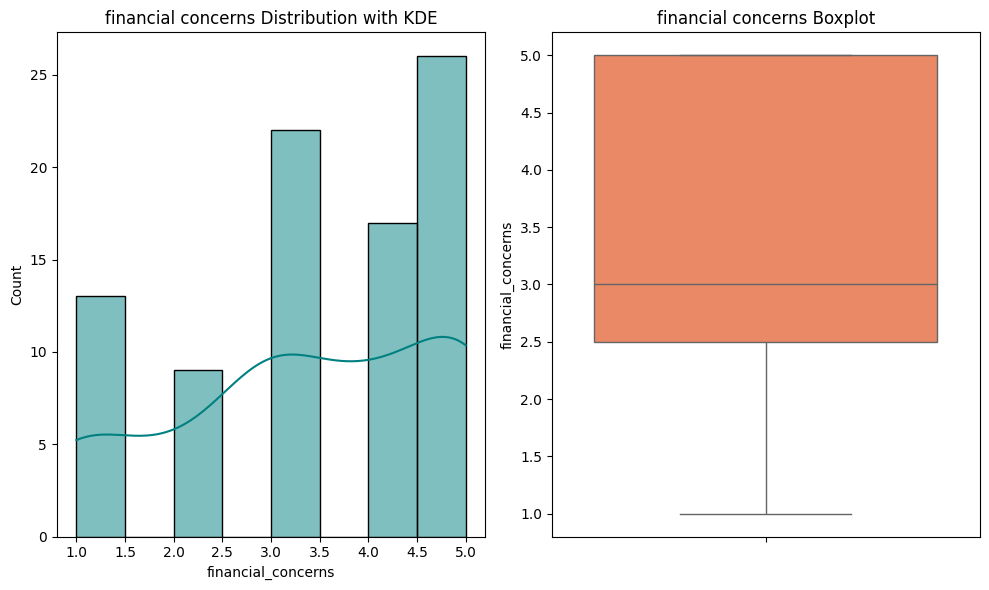


Summary Statistics for financial concerns:
 count    87.000000
mean      3.390805
std       1.400634
min       1.000000
25%       2.500000
50%       3.000000
75%       5.000000
max       5.000000
Name: financial_concerns, dtype: float64


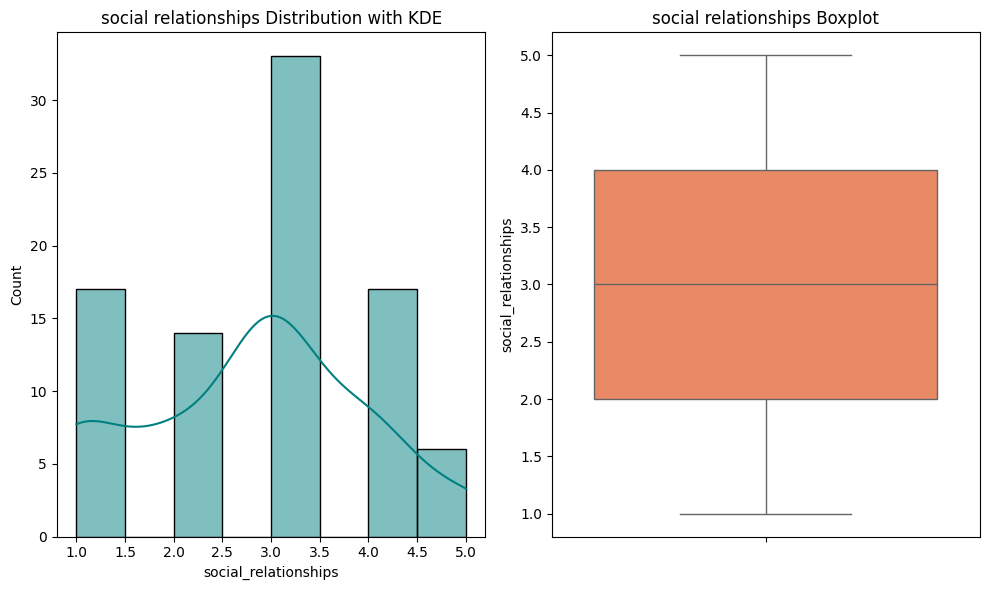


Summary Statistics for social relationships:
 count    87.000000
mean      2.781609
std       1.175578
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: social_relationships, dtype: float64


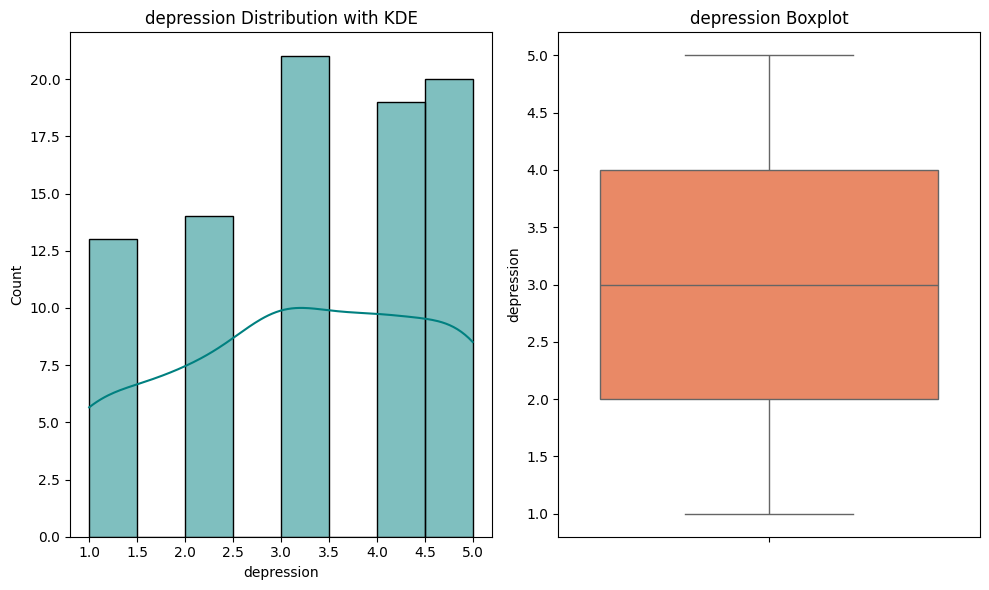


Summary Statistics for depression:
 count    87.000000
mean      3.218391
std       1.367609
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: depression, dtype: float64


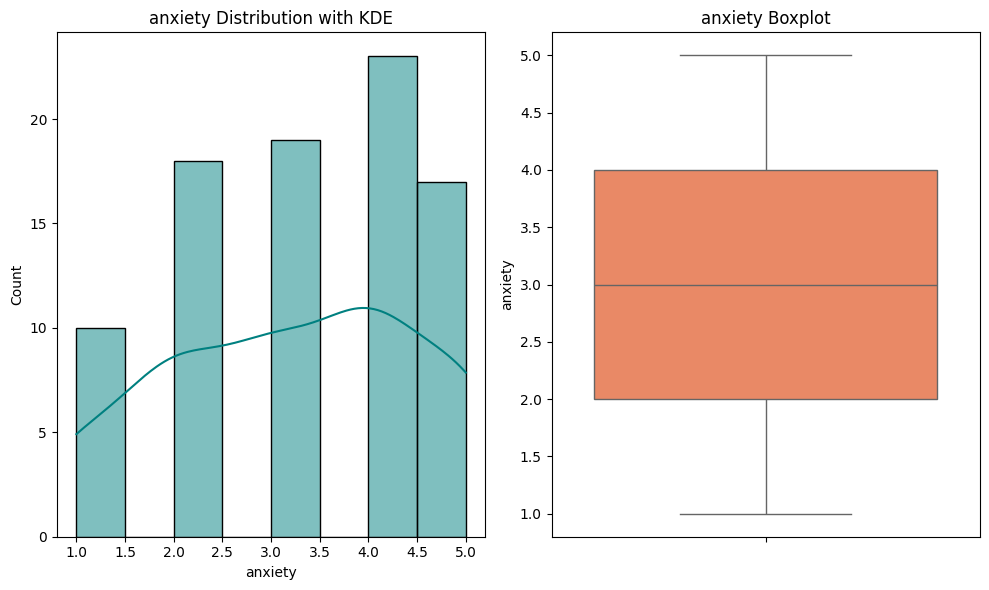


Summary Statistics for anxiety:
 count    87.000000
mean      3.218391
std       1.297809
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: anxiety, dtype: float64


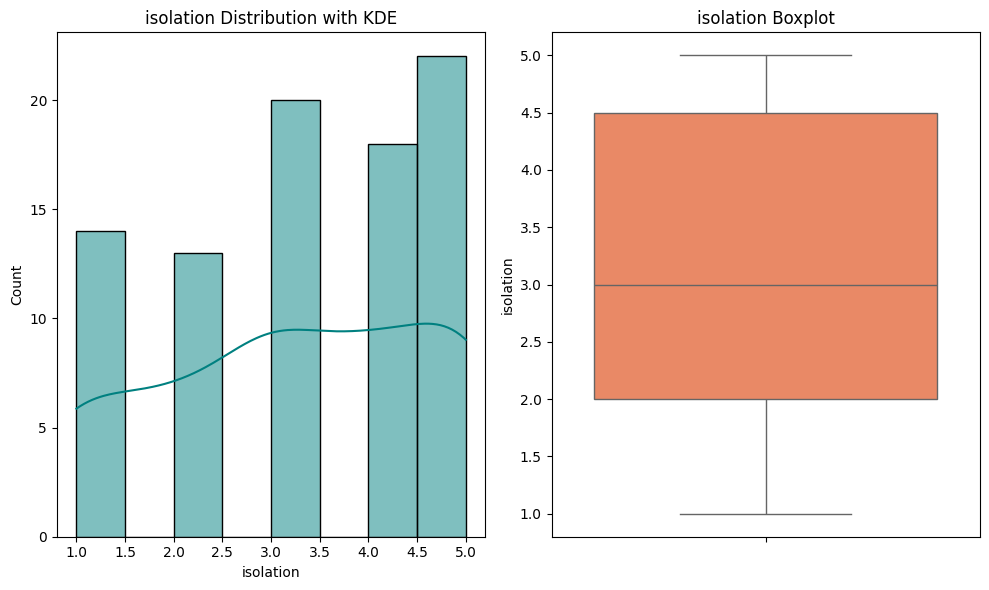


Summary Statistics for isolation:
 count    87.000000
mean      3.241379
std       1.405682
min       1.000000
25%       2.000000
50%       3.000000
75%       4.500000
max       5.000000
Name: isolation, dtype: float64


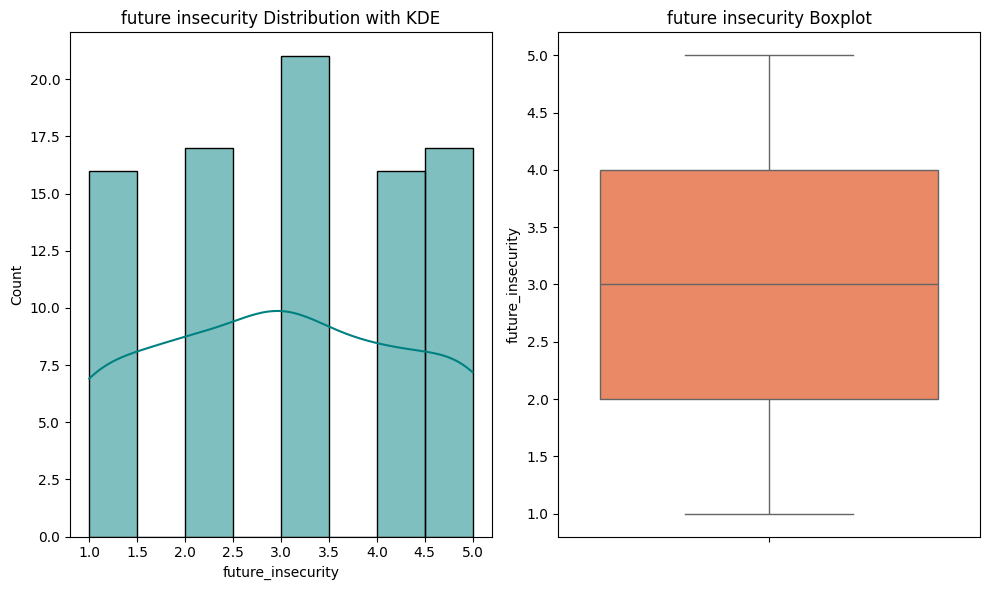


Summary Statistics for future insecurity:
 count    87.000000
mean      3.011494
std       1.385089
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: future_insecurity, dtype: float64


In [21]:
# Function to perform univariate analysis for numeric columns
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 6))

    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=True, color='teal')
    plt.title(f'{title} Distribution with KDE')

    plt.subplot(1, 2, 2)
    sns.boxplot(data[column], color='coral')
    plt.title(f'{title} Boxplot')

    plt.tight_layout()
    plt.show()

    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

columns_to_analyze = ['age', 'study_satisfaction', 'academic_workload ', 'academic_pressure', 'financial_concerns', 'social_relationships', 'depression', 'anxiety', 'isolation', 'future_insecurity']

for column in columns_to_analyze:
    univariate_analysis(df, column, column.replace('_', ' '))